In [15]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [9]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [19]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(measurement.date)).scalar()

In [ ]:
# Find the date one year from the last date in the data set.
one_year_ago = (most_recent_date - timedelta(days=365)

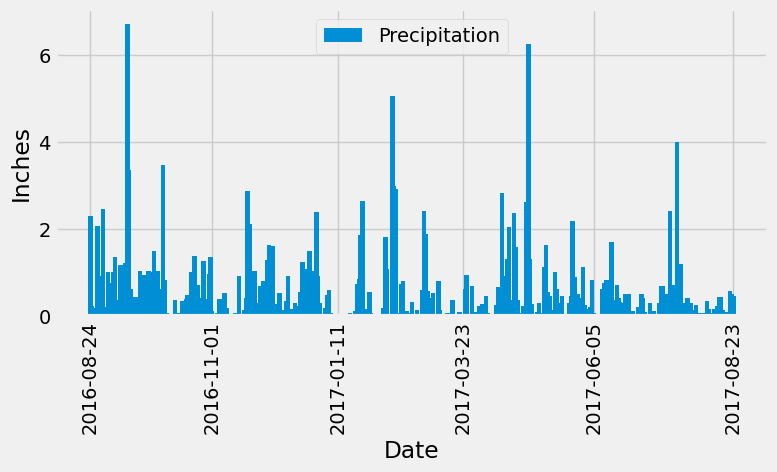

In [67]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = most_recent_date

# Calculate the date one year from the last date in data set.
one_year_ago = datetime.strptime(most_recent_date, "%Y-%m-%d") - timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(measurement.date, measurement.prcp).filter(measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_dataframe = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
precipitation_dataframe = precipitation_dataframe.sort_values("Date")

# Use Pandas Plotting with Matplotlib to plot the dat
plt.figure(figsize=(8, 5))
plt.bar(precipitation_dataframe["Date"], precipitation_dataframe["Precipitation"], width=2.5, label="Precipitation")

step = len(precipitation_df) // 5
plt.xticks(precipitation_dataframe["Date"][::step], rotation=90)
plt.legend(loc="upper center")

plt.xlabel("Date")
plt.ylabel("Inches")

plt.tight_layout()
plt.show()

In [76]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_dataframe.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [79]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(station.station)).scalar()
total_stations

9

In [81]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
active_stations = session.query(measurement.station, func.count(measurement.station).label('station_count')) \
    .group_by(measurement.station) \
    .order_by(func.count(measurement.station).desc())

# List the stations and their counts in descending order.
for station, count in active_stations:
    print({station}, {count})

{'USC00519281'} {2772}
{'USC00519397'} {2724}
{'USC00513117'} {2709}
{'USC00519523'} {2669}
{'USC00516128'} {2612}
{'USC00514830'} {2202}
{'USC00511918'} {1979}
{'USC00517948'} {1372}
{'USC00518838'} {511}


In [85]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = active_stations[0][0] 

temperature_stats = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs))\
    .filter(measurement.station == most_active_station)\
    .all()

lowest_temp, highest_temp, average_temp = temperature_stats[0]
print({lowest_temp, highest_temp, average_temp})

{85.0, 54.0, 71.66378066378067}


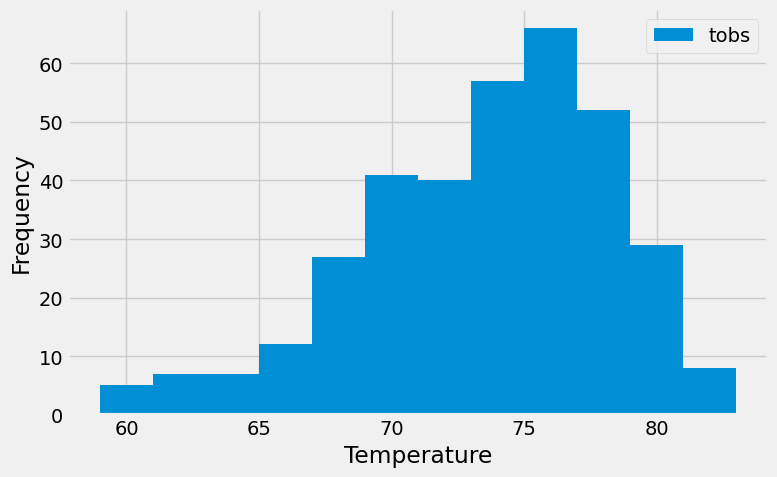

In [89]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_data = session.query(measurement.tobs)\
    .filter(measurement.station == most_active_station, measurement.date >= one_year_ago).all()

temperature_dataframe = pd.DataFrame(temperature_data, columns=["Temperature"])

plt.figure(figsize=(8, 5))
plt.hist(temperature_dataframe["Temperature"], bins=12, label="tobs")
plt.legend(loc="upper right")

plt.xlabel("Temperature")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Close Session

In [90]:
# Close Session
session.close()